In [2]:
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv("SalesFINAL12312016_clean.csv")


In [3]:
sales["SalesDate"] = pd.to_datetime(sales["SalesDate"])


In [4]:
ventas_diarias = (
    sales
    .groupby("SalesDate")["SalesDollars"]
    .sum()
    .reset_index()
)


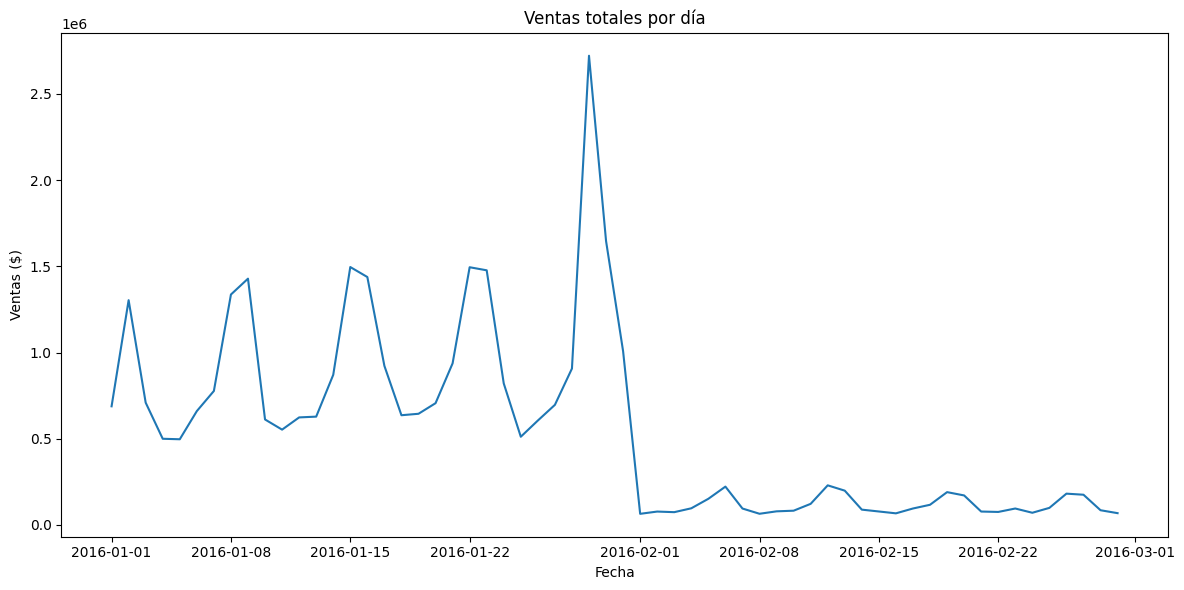

In [5]:
plt.figure(figsize=(12,6))
plt.plot(ventas_diarias["SalesDate"], ventas_diarias["SalesDollars"])
plt.title("Ventas totales por día")
plt.xlabel("Fecha")
plt.ylabel("Ventas ($)")
plt.tight_layout()
plt.show()


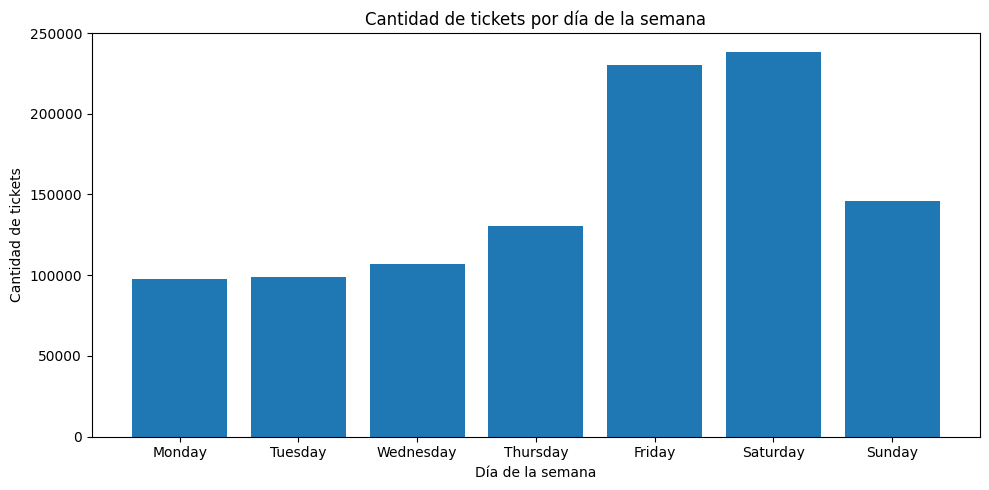

In [11]:
tickets_por_dia_semana = (
    sales
    .groupby("day_of_week")
    .size()
    .reset_index(name="CantidadTickets")
)

tickets_por_dia_semana["day_of_week"] = pd.Categorical(
    tickets_por_dia_semana["day_of_week"],
    categories=[
        "Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"
    ],
    ordered=True
)

tickets_por_dia_semana = tickets_por_dia_semana.sort_values("day_of_week")

plt.figure(figsize=(10,5))
plt.bar(
    tickets_por_dia_semana["day_of_week"],
    tickets_por_dia_semana["CantidadTickets"]
)
plt.title("Cantidad de tickets por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de tickets")
plt.tight_layout()
plt.show()


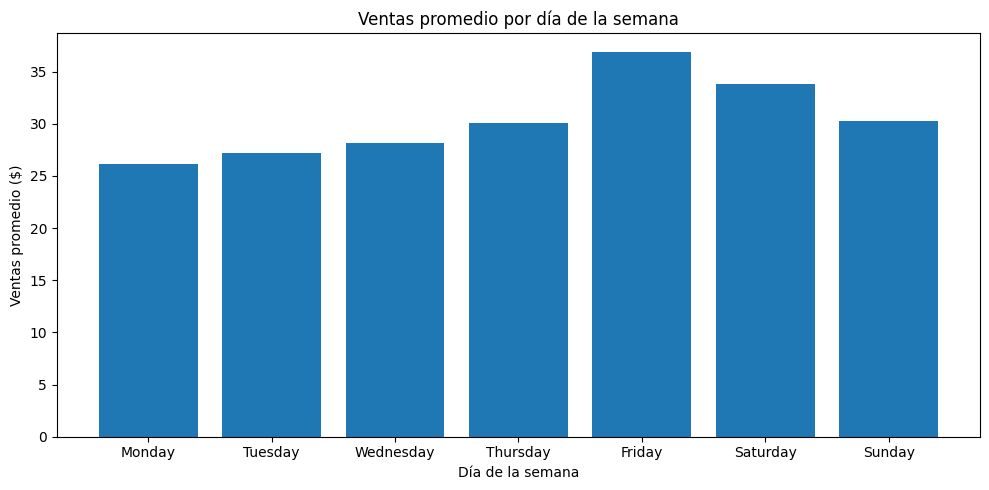

In [8]:
sales["day_of_week"] = sales["SalesDate"].dt.day_name()

ventas_por_dia_semana = (
    sales
    .groupby("day_of_week")["SalesDollars"]
    .mean()
    .reset_index()
)

orden_dias = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

ventas_por_dia_semana["day_of_week"] = pd.Categorical(
    ventas_por_dia_semana["day_of_week"],
    categories=orden_dias,
    ordered=True
)

ventas_por_dia_semana = ventas_por_dia_semana.sort_values("day_of_week")

plt.figure(figsize=(10,5))
plt.bar(
    ventas_por_dia_semana["day_of_week"],
    ventas_por_dia_semana["SalesDollars"]
)
plt.title("Ventas promedio por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Ventas promedio ($)")
plt.tight_layout()
plt.show()


In [36]:
ventas_por_dia = sales.groupby("day_of_week")["SalesDollars"].sum()
porcentaje_viernes_sabado = (
    ventas_por_dia.loc[["Friday","Saturday"]].sum() / ventas_por_dia.sum()
) * 100
print(f"Porcentaje de facturación viernes y sábado: {porcentaje_viernes_sabado:.2f}%")


Porcentaje de facturación viernes y sábado: 49.94%


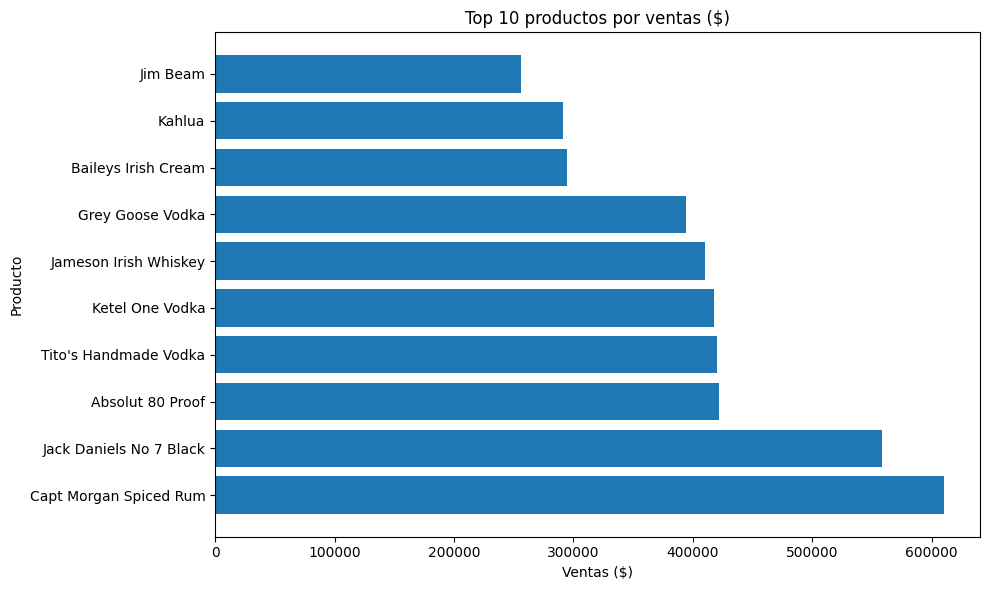

In [20]:
top_productos_dolares = (
    sales
    .groupby("Description")["SalesDollars"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.barh(top_productos_dolares["Description"], top_productos_dolares["SalesDollars"])
plt.title("Top 10 productos por ventas ($)")
plt.xlabel("Ventas ($)")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


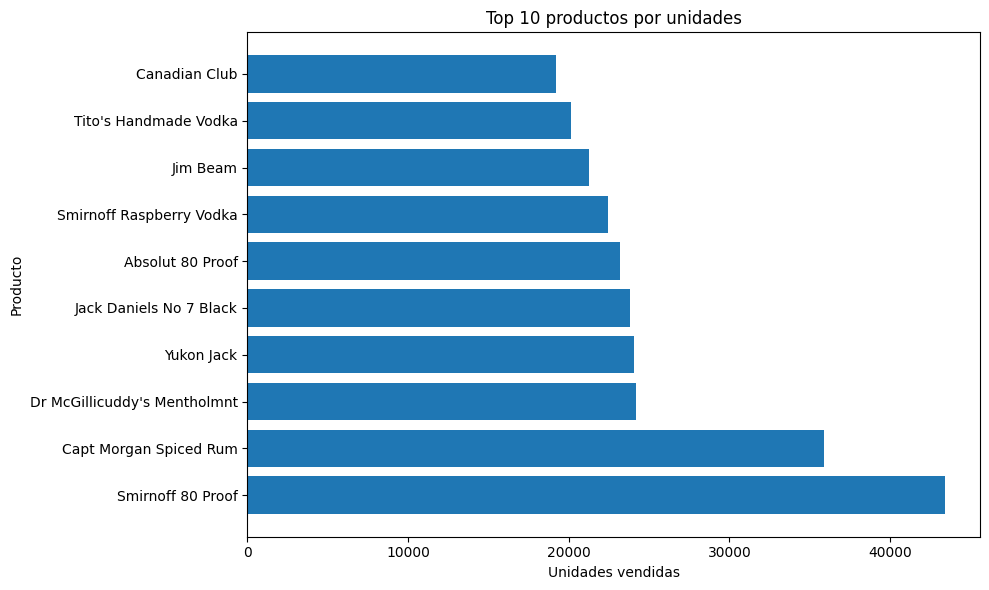

In [10]:
top_unidades = (
    sales
    .groupby("Description")["SalesQuantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.barh(top_unidades["Description"], top_unidades["SalesQuantity"])
plt.title("Top 10 productos por unidades")
plt.xlabel("Unidades vendidas")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()


In [38]:
ventas_producto = sales.groupby("Description")["SalesDollars"].sum()
porcentaje_top10_productos = (
    ventas_producto.sort_values(ascending=False).head(10).sum() / ventas_producto.sum()
) * 100

print(f"Porcentaje de facturación explicado por el Top 10 de productos: {porcentaje_top10_productos:.2f}%")


Porcentaje de facturación explicado por el Top 10 de productos: 12.29%


In [39]:
top_productos_tabla = (
    sales
    .groupby("Description")
    .agg(
        ventas_totales=("SalesDollars", "sum"),
        unidades_vendidas=("SalesQuantity", "sum"),
        precio_promedio=("SalesPrice", "mean")
    )
    .sort_values("ventas_totales", ascending=False)
)

top_productos_tabla.head(10)


,ventas_totales,unidades_vendidas,precio_promedio
Description,,,
Capt Morgan Spiced Rum,610008.34,35866,13.694124
Jack Daniels No 7 Black,558064.03,23797,20.592937
Absolut 80 Proof,422095.29,23171,16.966710
Tito's Handmade Vodka,420186.25,20125,19.288479
Ketel One Vodka,417950.59,15721,24.256610
Jameson Irish Whiskey,410287.84,17016,23.721637
Grey Goose Vodka,394280.19,15481,26.746503
Baileys Irish Cream,294738.43,17307,19.215920
Kahlua,290933.11,16389,17.670711


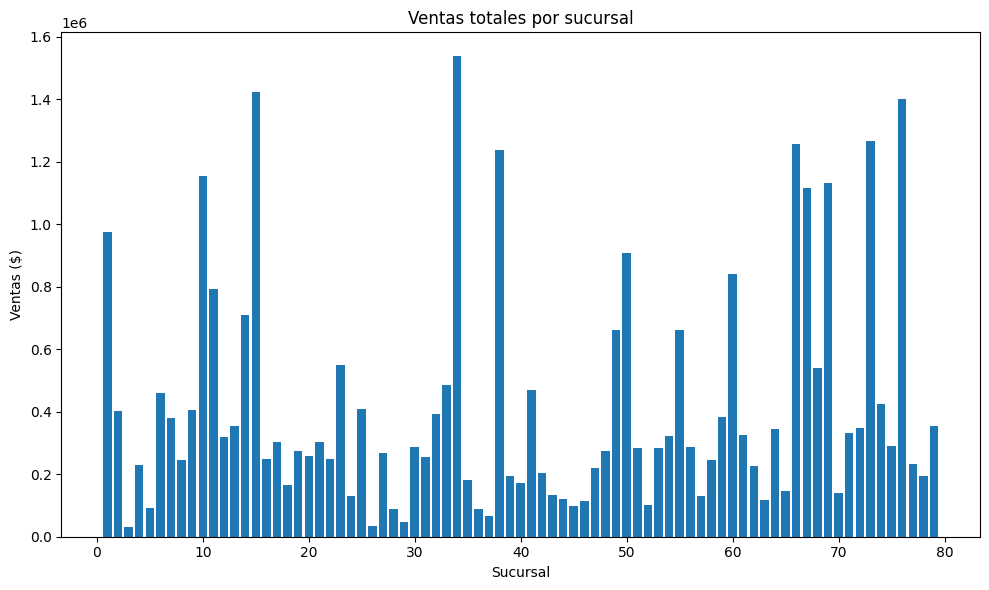

In [12]:
ventas_sucursal = (
    sales
    .groupby("Store")["SalesDollars"]
    .sum()
    .reset_index()
    .sort_values("SalesDollars", ascending=False)
)

plt.figure(figsize=(10,6))
plt.bar(ventas_sucursal["Store"], ventas_sucursal["SalesDollars"])
plt.title("Ventas totales por sucursal")
plt.xlabel("Sucursal")
plt.ylabel("Ventas ($)")
plt.tight_layout()
plt.show()


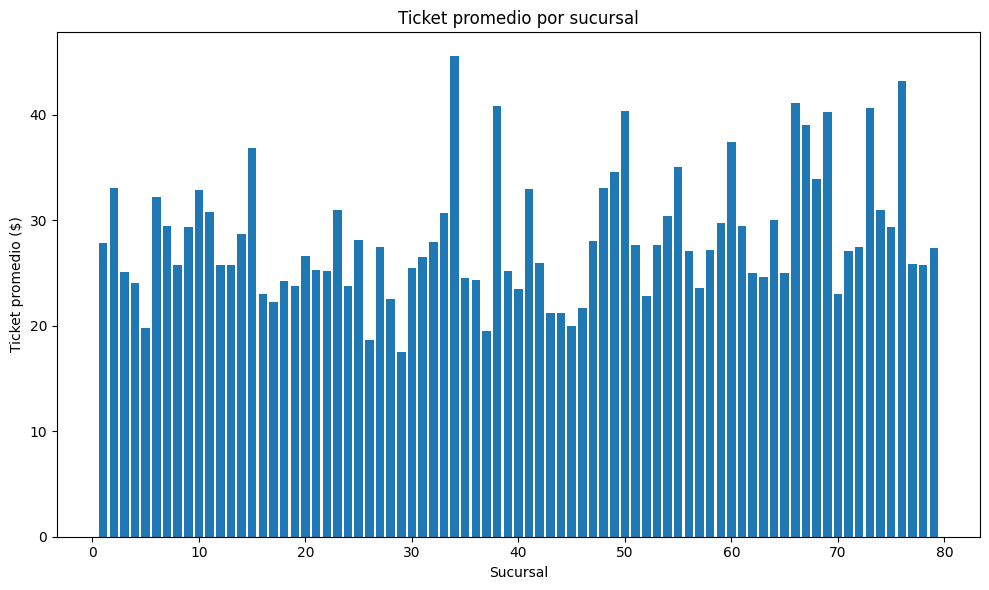

In [14]:
ticket_promedio_sucursal = (
    sales
    .groupby("Store")["SalesDollars"]
    .mean()
    .reset_index()
    .sort_values("SalesDollars", ascending=False)
)

plt.figure(figsize=(10,6))
plt.bar(ticket_promedio_sucursal["Store"], ticket_promedio_sucursal["SalesDollars"])
plt.title("Ticket promedio por sucursal")
plt.xlabel("Sucursal")
plt.ylabel("Ticket promedio ($)")
plt.tight_layout()
plt.show()


In [40]:
ventas_sucursal_tabla = (
    sales
    .groupby("Store")
    .agg(
        ventas_totales=("SalesDollars", "sum"),
        tickets=("SalesDollars", "count"),
        ticket_promedio=("SalesDollars", "mean")
    )
    .sort_values("ventas_totales", ascending=False)
)

ventas_sucursal_tabla.head(10)


,ventas_totales,tickets,ticket_promedio
Store,,,
34,1537806.51,33780,45.524171
15,1422998.94,38637,36.829954
76,1402698.59,32456,43.218468
73,1266850.62,31184,40.625020
66,1257824.93,30600,41.105390
38,1237991.19,30305,40.851054
10,1154926.80,35130,32.875798
69,1131369.88,28104,40.256543
67,1117046.85,28649,38.990780


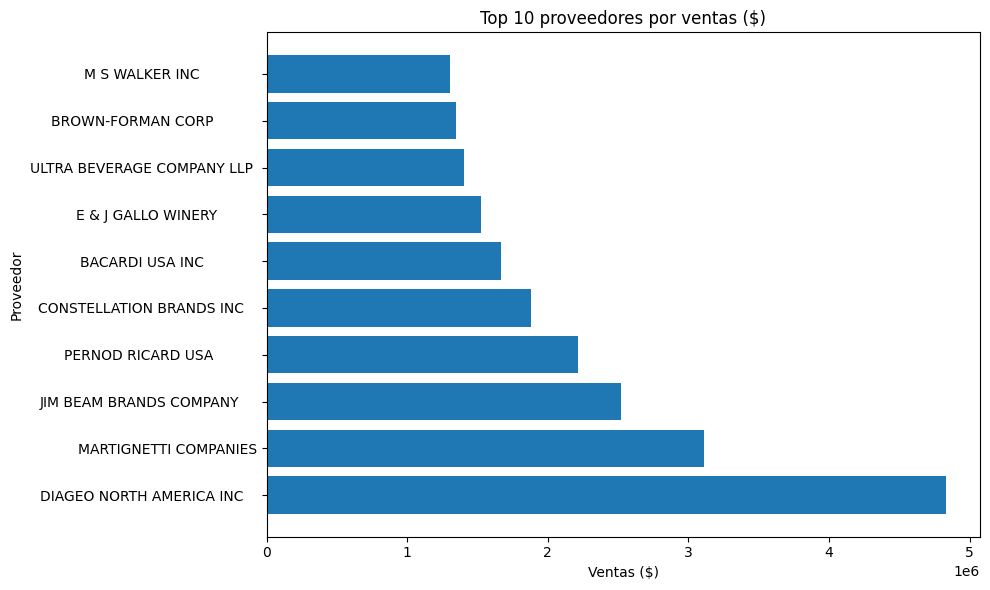

In [16]:
ventas_proveedor = (
    sales
    .groupby("VendorName")["SalesDollars"]
    .sum()
    .reset_index()
    .sort_values("SalesDollars", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
plt.barh(ventas_proveedor["VendorName"], ventas_proveedor["SalesDollars"])
plt.title("Top 10 proveedores por ventas ($)")
plt.xlabel("Ventas ($)")
plt.ylabel("Proveedor")
plt.tight_layout()
plt.show()


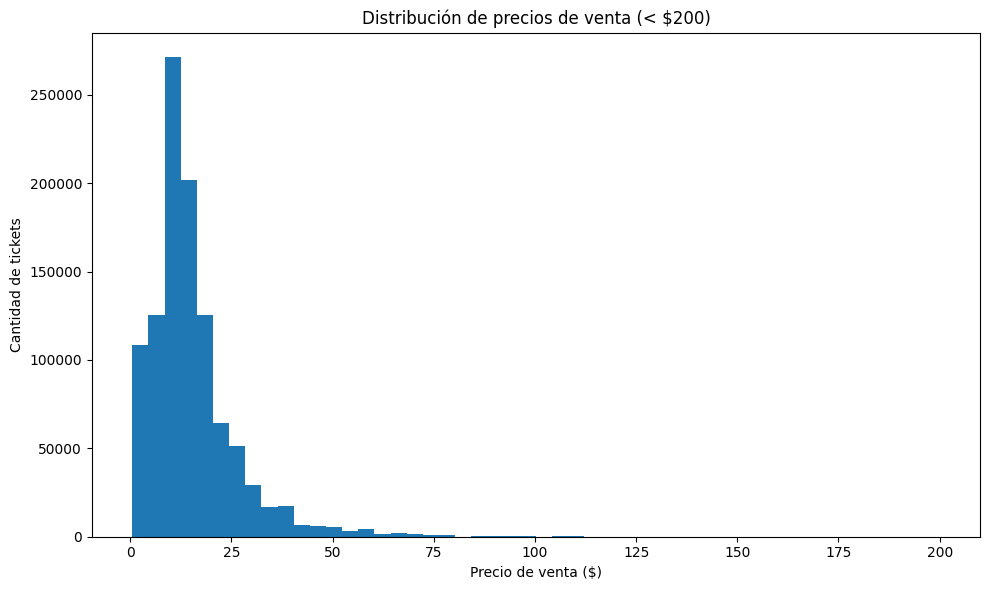

In [29]:
plt.figure(figsize=(10,6))
plt.hist(sales[sales["SalesPrice"] < 200]["SalesPrice"], bins=50)
plt.title("Distribución de precios de venta (< $200)")
plt.xlabel("Precio de venta ($)")
plt.ylabel("Cantidad de tickets")
plt.tight_layout()
plt.show()


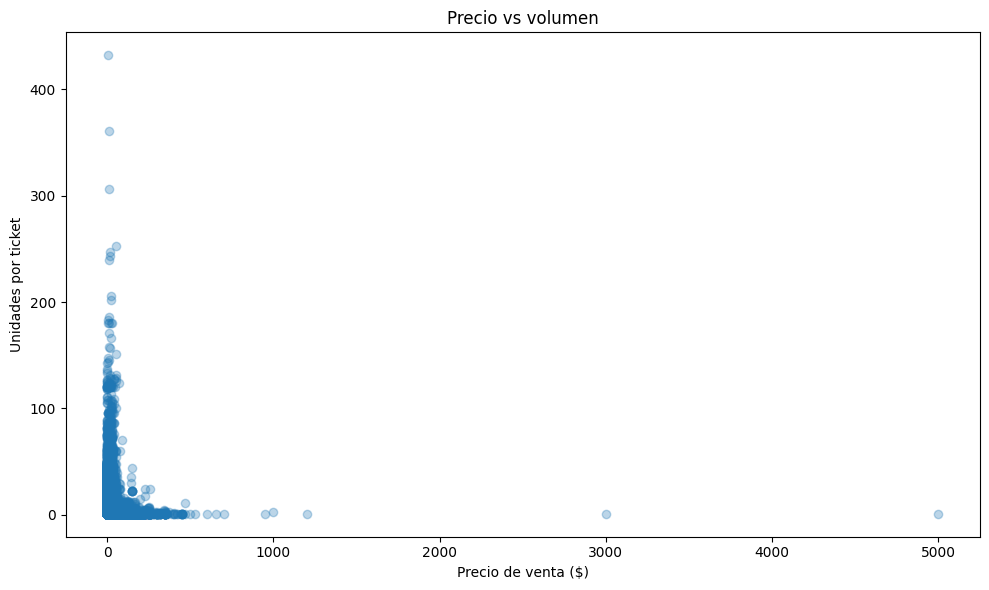

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(sales["SalesPrice"], sales["SalesQuantity"], alpha=0.3)
plt.title("Precio vs volumen")
plt.xlabel("Precio de venta ($)")
plt.ylabel("Unidades por ticket")
plt.tight_layout()
plt.show()


Las ventas presentan un patrón semanal donde los viernes y sábado concentran la mayor cantidad de operaciones y, además, muestran un ticket promedio más alto. La facturación se encuentra concentrada en un conjunto reducido de productos, donde se distinguen productos relevantes por volumen (EJ Smirnoff 80 Proof) y productos relevantes por facturación (EJ Jack Daniels No 7 Black). Dentro de este grupo, Capt Morgan Spiced Rum se destaca como un producto clave, ya que combina alta rotación con una elevada contribución a la facturación, lo que lo convierte en un candidato prioritario para analizar márgenes al cruzar con compras.

Las sucursales que más venden lo hacen principalmente por una mayor cantidad de tickets y no por un ticket promedio más elevado. Esto sugiere que las diferencias entre tiendas están explicadas fundamentalmente por el tráfico o la demanda que reciben, más que por una estrategias de precios.

A nivel de proveedores, la facturación se encuentra fuertemente concentrada, con Diageo dominando claramente las ventas totales, hay una alta concentracion de productos en pocos proveedores.

En cuanto a los precios, existe una fuerte concentración en rangos bajos y una relación inversa marcada entre precio y volumen: a mayor precio, menor cantidad de unidades vendidas. Si bien existen productos de precios elevados, estos representan ventas aisladas y actúan como outliers. En conjunto, el modelo de negocio se sostiene principalmente por la rotación de productos de bajo y mediano precio, más que por la venta de tickets caros.